# Description : This program uses an artifical recurrent neural network called Long Short Term Memory(LSTM) to predict the closing stock price of a corporation (Apple.inc) using the past 60 days stock price                


In [1]:
# import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get the stock quote
df = web.DataReader('AAPL',data_source = 'yahoo', start='2012-01-01', end='2019-12-17')

# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591939
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659607
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800154
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913450
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.701691
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.871689
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.780685


In [3]:
# Get the number of rows and columns in the datasets
df.shape

(2003, 6)

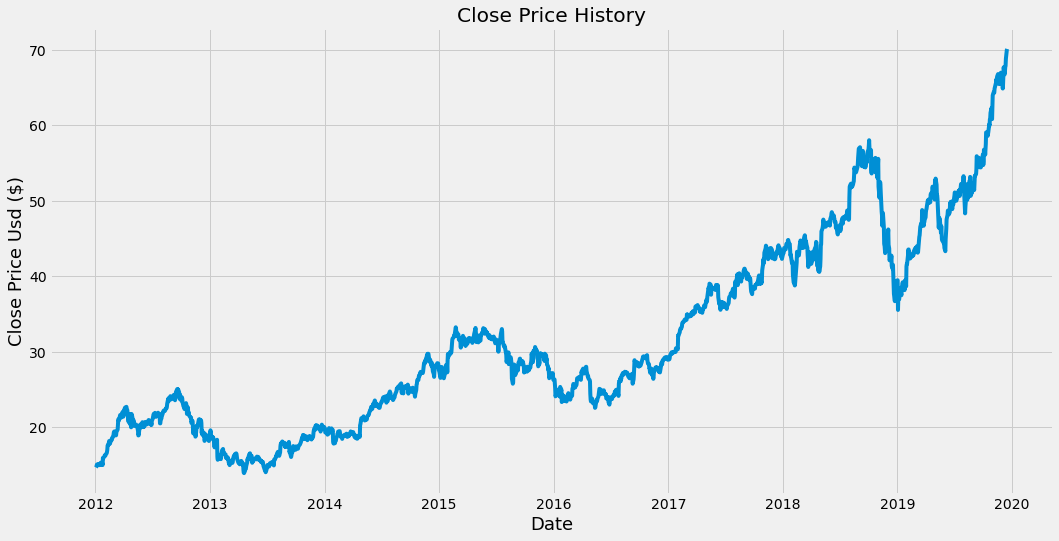

In [4]:
# Visualisize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price Usd ($)', fontsize = 18)
plt.show()

In [5]:
# Create a new DataFrame with only the 'close colomn'
data = df.filter(['Close'])

#Convert the DataFrame to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1603

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [18]:
# Create the training data set
# Create the svaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train sets
x_train = []
y_train = []

for i in range (60, len (train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61 :
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [8]:
# Convert the x_train and y_train to arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Train the Model
model.fit(x_train, y_train, batch_size=1,epochs=1)

1543/1543 [==============================] - 108s 64ms/step - loss: 7.9470e-04


In [13]:
# Create the testing data set 
# Create a new array containing scaled values from index 1534 to 2003
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean Squared errors (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.0064530832627723

<ipython-input-26-dcb8edb7e46f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


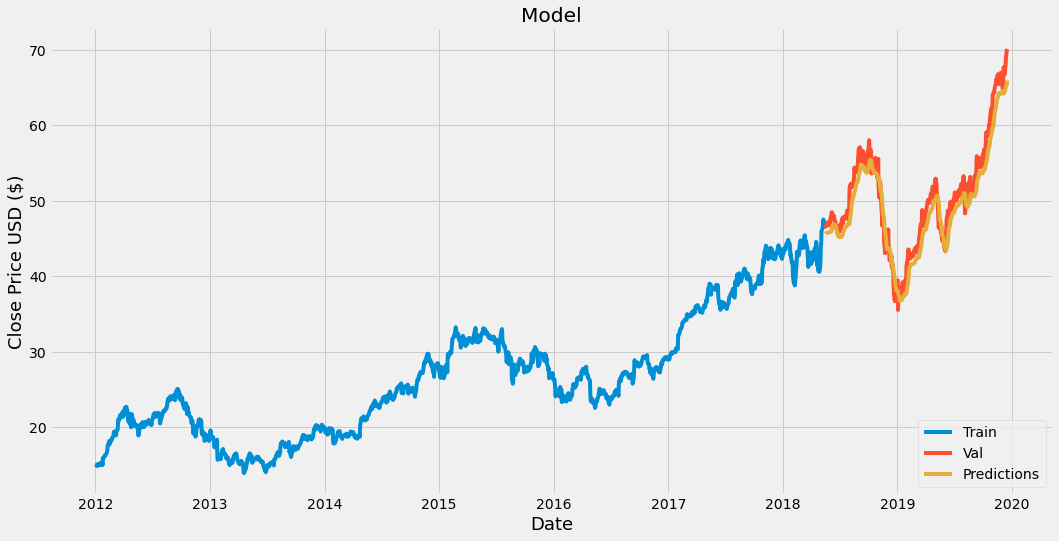

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()


In [27]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.641262
2018-05-18,46.577499,45.711906
2018-05-21,46.907501,45.718937
2018-05-22,46.790001,45.737282
2018-05-23,47.090000,45.741421
...,...,...
2019-12-11,67.692497,64.687027
2019-12-12,67.864998,64.904663
2019-12-13,68.787498,65.135239


In [28]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2019-12-17')

# Create a new dataFrame
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closung prices values and convert the dataframe to an array
last_60_day = new_df[-60:].values

# Scale the data to be values betwee 0 and 1
last_60_day_scaled = scaler.transform(last_60_day)

#Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_day_scaled)

#Convert the x_test data set a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[66.39671]]


In [31]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
